As it is a “linear” Regression Technique, only linear term of each feature will be taken in the framing of the hypothesis. Let, x_1, x_2, … x_n, be the features on which the Target Outcome depends upon. Then, the hypothesis for Multi-Variate Linear Regression:

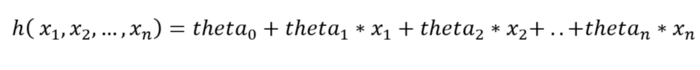

where theta_0, theta_1, theta_2, theta_3,…., theta_n are the parameters

Also, the above hypothesis can be re-framed in terms of Vector Algebra too:

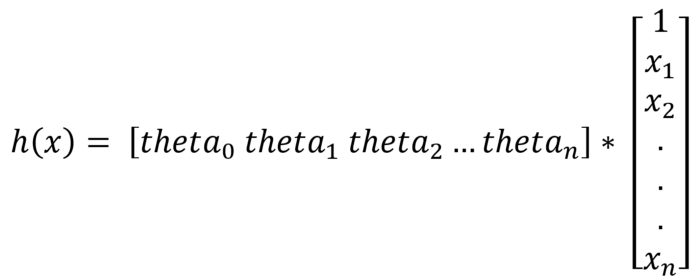





There is also a cost function (or loss function) associated with the hypothesis dependent upon parameters, theta_0, theta_1, theta_2, … ,theta_n.
The cost function here is the same as in the case of Polynomial Regression [1].
So, these parameters, theta_0, theta_1, theta_2, …, theta_n have to assume such values for which the cost function (or simply cost) reaches to its minimum value possible. In other words, the minima of the Cost Function have to be found out.

Batch Gradient Descent can be used as the Optimization Strategy in this case.



In [ ]:
from google.colab import files

uploaded = files.upload()

Saving data2.txt to data2.txt


Implementation of Multi-Variate Linear Regression using Batch Gradient Descent:
The implementation is done by creating 3 modules each used for performing different operations in the Training Process.

 hypothesis(): 

It is the function that calculates and outputs the hypothesis value of the Target Variable, given theta (theta_0, theta_1, theta_2, theta_3, …., theta_n), Features in a matrix, X of dimension [m X (n+1)] where m is the number of samples and n is the number of features. The implementation of hypothesis() is given below:

In [ ]:
def hypothesis(theta, X, n):
    h = np.ones((X.shape[0],1))
    theta = theta.reshape(1,n+1)
    for i in range(0,X.shape[0]):
        h[i] = float(np.matmul(theta, X[i]))
    h = h.reshape(X.shape[0])
    return h

BGD():

 It is the function that performs the Batch Gradient Descent Algorithm taking current value of theta (theta_0, theta_1,…, theta_n), learning rate (alpha), number of iterations (num_iters), list of hypothesis values of all samples (h), feature set (X), Target Variable set (y) and Number of Features (n) as input and outputs the optimized theta (theta_0, theta_1, theta_2, theta_3, …, theta_n) and the cost history or cost which contains the value of the cost function over all the iterations. The implementation of BGD() is given below:

In [ ]:
def BGD(theta, alpha, num_iters, h, X, y, n):
    cost = np.ones(num_iters)
    for i in range(0,num_iters):
        theta[0] = theta[0] - (alpha/X.shape[0]) * sum(h - y)
        for j in range(1,n+1):
            theta[j] = theta[j] - (alpha/X.shape[0]) * sum((h-y) * X.transpose()[j])
        h = hypothesis(theta, X, n)
        cost[i] = (1/X.shape[0]) * 0.5 * sum(np.square(h - y))
    theta = theta.reshape(1,n+1)
    return theta, cost

linear_regression(): 

It is the principal function that takes the features matrix (X), Target Variable Vector (y), learning rate (alpha) and number of iterations (num_iters) as input and outputs the final optimized theta i.e., the values of [theta_0, theta_1, theta_2, theta_3,….,theta_n] for which the cost function almost achieves minima following Batch Gradient Descent, and cost which stores the value of cost for every iteration.

In [ ]:
def linear_regression(X, y, alpha, num_iters):
    n = X.shape[1]
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column, X), axis = 1)
    # initializing the parameter vector...
    theta = np.zeros(n+1)
    # hypothesis calculation....
    h = hypothesis(theta, X, n)
    # returning the optimized parameters by Gradient Descent...
    theta, cost = BGD(theta,alpha,num_iters,h,X,y,n)
    return theta, cost


Now, let’s move on to the Application of the Multi-Variate Linear Regression on a Practical Practice Data-Set.


Let us consider a Housing Price Data-Set of Portland, Oregon. It contains size of the house (in square feet) and number of bedrooms as features and price of the house as the Target Variable. 

**Problem Statement:**

“Given the size of the house and number of bedrooms, analyze and predict the possible price of the house”

**Data Reading into Numpy Arrays :**


In [ ]:
data = np.loadtxt('data2.txt', delimiter=',')
X_train = data[:,[0,1]] #feature set
y_train = data[:,2] #label set

**Feature Normalization or Feature Scaling:**

This involves scaling the features for fast and efficient computation.

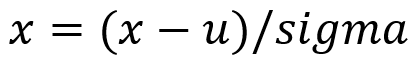

where u is the Mean and sigma is the Standard Deviation:

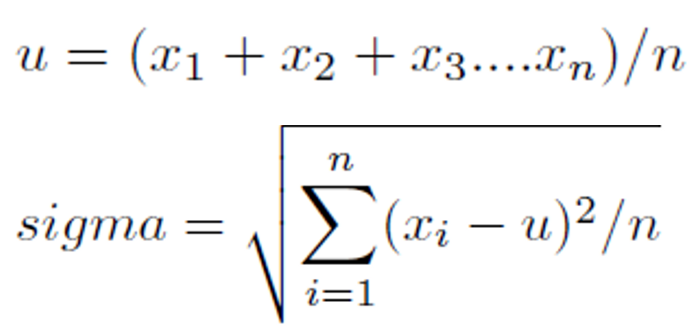




**Implementation of feature scaling:**

In [ ]:
mean = np.ones(X_train.shape[1])
std = np.ones(X_train.shape[1])
for i in range(0, X_train.shape[1]):
    mean[i] = np.mean(X_train.transpose()[i])
    std[i] = np.std(X_train.transpose()[i])
    for j in range(0, X_train.shape[0]):
        X_train[j][i] = (X_train[j][i] - mean[i])/std[i]

In [ ]:
mean

array([2000.68085106,    3.17021277])

In [ ]:
std

array([7.86202619e+02, 7.52842809e-01])

In [ ]:
# calling the principal function with learning_rate = 0.0001 and 
# num_iters = 300000
theta, cost = linear_regression(X_train, y_train,0.0001, 300000)

In [ ]:
theta

array([[340412.65957418, 109447.6892473 ,  -6578.24763182]])

The cost has been reduced in the course of Batch Gradient Descent iteration-by-iteration. The reduction in the cost is shown with the help of Line Curve.

Text(0, 0.5, 'Cost')

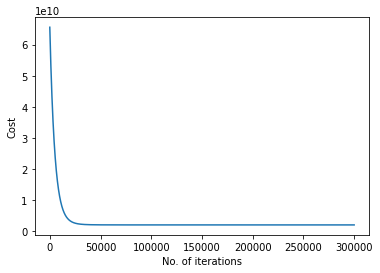

In [ ]:
import matplotlib.pyplot as plt
cost = list(cost)
n_iterations = [x for x in range(1,300001)]
plt.plot(n_iterations, cost)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')

Side-by-Side Visualization of Features and Target Variable Actual and Prediction using 3-D Scatter Plots :

**Actual Target Variable Visualization:**

Text(0.5, 0, 'Actual Housing Price')

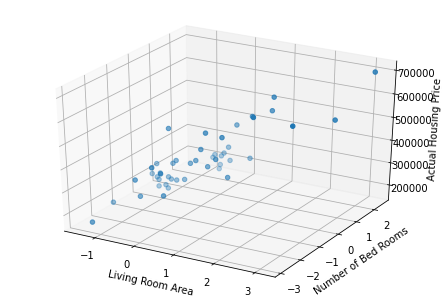

In [ ]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
sequence_containing_x_vals = list(X_train.transpose()[0])
sequence_containing_y_vals = list(X_train.transpose()[1])
sequence_containing_z_vals = list(y_train)
fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals,
           sequence_containing_z_vals)
ax.set_xlabel('Living Room Area', fontsize=10)
ax.set_ylabel('Number of Bed Rooms', fontsize=10)
ax.set_zlabel('Actual Housing Price', fontsize=10)

**Prediction Target Variable Visualization:**

Text(0.5, 0, 'Housing Price Predictions')

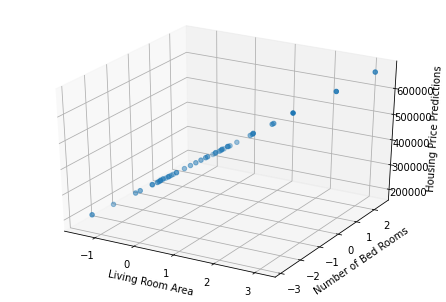

In [ ]:
X_train = np.concatenate((np.ones((X_train.shape[0],1)), X_train)
                         ,axis = 1)
predictions = hypothesis(theta, X_train, X_train.shape[1] - 1)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
sequence_containing_x_vals = list(X_train.transpose()[1])
sequence_containing_y_vals = list(X_train.transpose()[2])
sequence_containing_z_vals = list(predictions)
fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals,
           sequence_containing_z_vals)
ax.set_xlabel('Living Room Area', fontsize=10)
ax.set_ylabel('Number of Bed Rooms', fontsize=10)
ax.set_zlabel('Housing Price Predictions', fontsize=10)

That’s all about the Implementation of Multi-Variate Linear Regression in Python using Gradient Descent from scratch.